# Metropolis Algorithm

#### Jessica Morrise

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy import random

### Problem 1

In [2]:
def random_config(n):
    '''
    Return a random nxn spin configuration as an np.ndarray.
    '''
    config = random.rand(n,n)
    config[config>0.5] = 1
    config[config<1] = -1
    return config

def show_config(config):
    plt.imshow(config,cmap='gray',interpolation='nearest')
    plt.show()

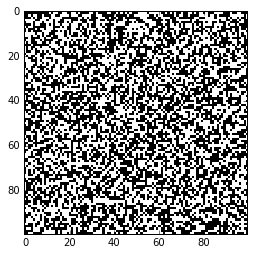

In [3]:
C = random_config(100)
show_config(C)

### Problem 2

In [46]:
def compute_energy(config):
    J = -1
    H_h = np.sum(np.roll(config,1,axis=0)*config)
    H_v = np.sum(np.roll(config,1,axis=1)*config)
    return J*(H_h + H_v)

### Problem 3

In [47]:
def propose_site(n):
    return random.randint(0,n,2)

### Problem 4

In [48]:
def compute_new_energy(config, H, site):
    n = config.shape[0]
    x = site[0]
    y = site[1]
    p = -config[x,y]
    for i in [1, -1]:
        H -= 2*p*config[(x+i)%n,y]
        H -= 2*p*config[x,(y+i)%n]
    return H

### Problem 5

In [53]:
def accept_proposal(H, H_star, beta):
    if H_star < H:
        return True
    else:
        p = np.exp(beta*(H-H_star))
        return np.random.rand()<p

### Problem 6

In [70]:
def ising_sampler(beta):
    n = 100
    n_samples = 200000
    H_vector = []
    config_vector = []
    
    C = random_config(n)
    H = compute_energy(C)
    #show_config(C)
    
    #burn in
    n_burn = 20000
    for i in xrange(n_samples+n_burn):
        site = propose_site(n)
        H_star = compute_new_energy(C,H,site)
        H_vector.append(-beta*H)
        a = accept_proposal(H, H_star, beta)
        if a:
            C[site[0],site[1]] *= -1
            H = H_star
        if i%100 == 0 and i>n_burn:
            config_vector.append(C)
        
    return config_vector, np.array(H_vector)

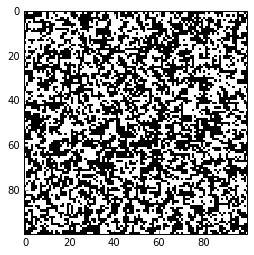

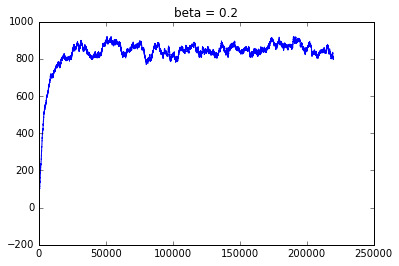

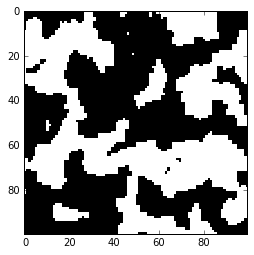

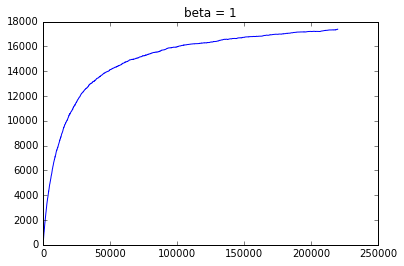

In [71]:
samples, H = ising_sampler(.2)
show_config(samples[-1])
plt.title('beta = 0.2')
plt.plot(np.arange(len(H)),H)
plt.show()

samples, H = ising_sampler(1)
show_config(samples[-1])
plt.title('beta = 1')
plt.plot(np.arange(len(H)),H)
plt.show()